RECOMMENDATION SYSTEM

RMSE: 0.9436
MAE:  0.7441

Model Evaluation:
 - RMSE: 0.9436
 - MAE : 0.7441

top 4 recommendations for a few users:

User 391:
 -Movie ID 180,predicted rating:4.46
 -Movie ID 132,predicted rating:4.44
 -Movie ID 427,predicted rating:4.39
 -Movie ID 318,predicted rating:4.37

User 181:
 -Movie ID 285,predicted rating:2.54
 -Movie ID 251,predicted rating:2.49
 -Movie ID 117,predicted rating:2.38
 -Movie ID 302,predicted rating:2.29

User 637:
 -Movie ID 127,predicted rating:3.43
 -Movie ID 285,predicted rating:3.17
 -Movie ID 286,predicted rating:3.1
 -Movie ID 257,predicted rating:3.08


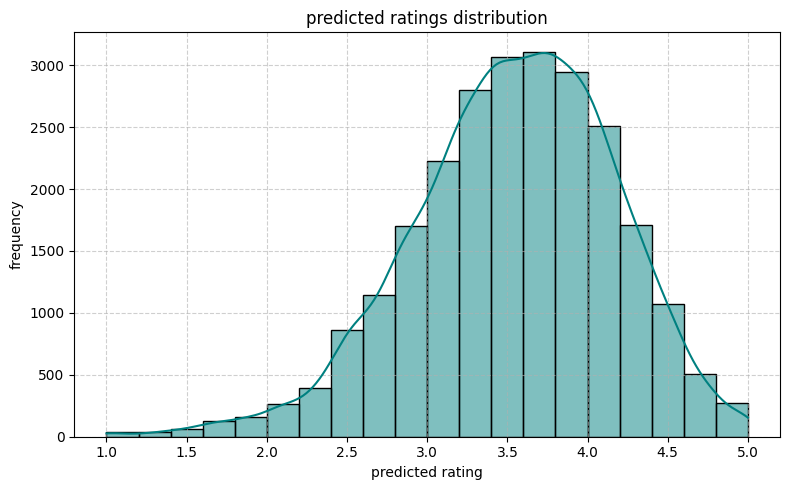

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from surprise import Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

#load MovieLens 100k dataset
data = Dataset.load_builtin('ml-100k')

#split data into training and test sets
train_set,test_set=train_test_split(data,test_size=0.25,random_state=42) #25% testing 75%traning

#train SVD model
model = SVD()
model.fit(train_set)

#predictions on test data
preds=model.test(test_set)

# evaluate performance
rmse = accuracy.rmse(preds)
mae = accuracy.mae(preds)

print(f"\nModel Evaluation:")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")

# function to get top-N predictions per user
def get_top_n(predictions,n=4):
    recommendations = defaultdict(list)
    
    for p in predictions:
        # store each prediction for its user
        recommendations[p.uid].append((p.iid, p.est))
    
    # sort and slice top-N for each user
    for user in recommendations:
        sorted_ratings = sorted(recommendations[user], key=lambda x: x[1], reverse=True)
        recommendations[user] = sorted_ratings[:n]
    
    return recommendations

#top 4 movie recommendations per user
user_top_recs=get_top_n(preds,n=4)

#print
print("\ntop 4 recommendations for a few users:")
sample_users = list(user_top_recs.items())[:3]

for user_id, recs in sample_users:
    print(f"\nUser {user_id}:")
    for movie_id, rating in recs:
        print(f" -Movie ID {movie_id},predicted rating:{round(rating,2)}")

# plot predicted ratings
est_ratings=[p.est for p in preds]
plt.figure(figsize=(8,5))
sns.histplot(est_ratings,bins=20,kde=True,color='teal')
plt.title("predicted ratings distribution")
plt.xlabel("predicted rating")
plt.ylabel("frequency")
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()
